In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
churn_count= df['Churn'].value_counts()
churn_count

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
pip install summarytools


In [8]:
from summarytools import dfSummary

In [9]:
df.drop('customerID',axis=1,inplace=True)

In [10]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,gender[object],1. Male2. Female,"3,555 (50.5%)3,488 (49.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
2,SeniorCitizen[int64],Mean (sd) : 0.2 (0.4)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.4),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6tYN7t6aWV24/5RzXgtngS9XQ3X3tu/7XQihK1m+LMvB3ffEimfdeqLWIYRuHMc1xrg9sjil1EzT1M3zXJsZoeIpN1/9ZmYxxm0YhmPB/rZgBviGjylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIqN59APwf7t6aWV04fso5rz9dJFS8hLu3fd/vQghdyfyyLAd33/8UK6HiVeoQQjeO4xpj3B4ZTCk10zR18zzXZkao+H0xxm0YhmPBaHvtIh9TkECokECokECokECokECokECokECokECokHDXn6mUUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8AkonTn3BAu6AAAAAAElFTkSuQmCC"">",0(0.0%)
3,Partner[object],1. No2. Yes,"3,641 (51.7%)3,402 (48.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bwYnDMBRF0a9BhMlGwhhcjIuYYqcIdWOMtUhCNspiCog1gidE7qngYy6GBD9XSjFAwZnZ1cwuvQ8Z2LOUcu99xAj8PM8/IYSp9yGjyjnvzrlfgnvPhxCmdV3vMcZH72NGcxzHd0pp2rbtYmbE9oY3M4sxPpZlufU+ZlDX3geM4qv3AfgcxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yHizv48Aex8yIp5bHZ9z3lNKk/ER4L/knHcze/a+YwQMXtoxeDnJMeWDCm+2OrzFGjDlq8Bsrw1TvpOY7bVjyleHX+wN+FMXMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgw5TuJZ9SOKV8FZnttGLzUYfDS4AUKW2rfd+DJGgAAAABJRU5ErkJggg=="">",0(0.0%)
4,Dependents[object],1. No2. Yes,"4,933 (70.0%)2,110 (30.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bwYnDMBRF0a9gQrKRMAYX4yKm2BShboyxFpOQjWaRAmLP4omP7qngQ24CMX6h1mqAQjCzu5ldWx+CU9611mfrI84apmn6iTGOrQ/BcaWULYTw8BbcEGMcl2V5ppRerY/Bd/u+33LO47quVzPzFZuZWUrpNc/zb+tjcNi99QH/cWl9APpBbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDzGD2eSGv9SE4xvNnNZRStpzzaE5fyOtRKWUzs3frO85i8OKTy8FLYMoHFc+/bC6/3T1zO+XzOmfrmcspn+c5W888T/n49+wMD3UhQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig4zLKZ+3e/Hhdsrndc7WMwYvkPkDCltq31ddjPwAAAAASUVORK5CYII="">",0(0.0%)
5,tenure[int64],Mean (sd) : 32.4 (24.6)min < med < max:0.0 < 29.0 < 72.0IQR (CV) : 46.0 (1.3),73 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyklEQVR4nO3dvW/aQBiA8fcgRMdHbfHRZPPSMVIHpCxZunXsH9u1WweQOjN06cQSISHHCDcIY+gSqkhtA77DqV/0/Obc2VIehfNhx2a32wlQdbX/fQLAMS4O/YAxpikil47zr3e73aPjWOC3F0M1xjT7/f6nIAi6LpMvFovYGPOZWOHr0F/UyyAIund3d49hGK6KTJwkiR2NRt35fH4pIoQKLwc/+kVEwjBcXV1d/XSYv+kwBvgDF1NQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFDhqDv8gWOU+SAooeIkyn4QlFBxKqU+CEqoOKmyHgTlYgoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqFDqd/15njdEJDDGuE7BOwAgIiWGmqZpI8uy91EU1ev1eqG7afZ4BwD2Sgt1vV5fWGtbw+FwdX19HRcdzzsA8Fzpt/m1223X27

Gender is not effecting the churn 

90% of the population have the phone service


About 21% of the people don't have internet security

Among people having internet

1)50% have no online security 

2)43% have no online backup

3)43% have no device protection

4)50% have no Tech support 


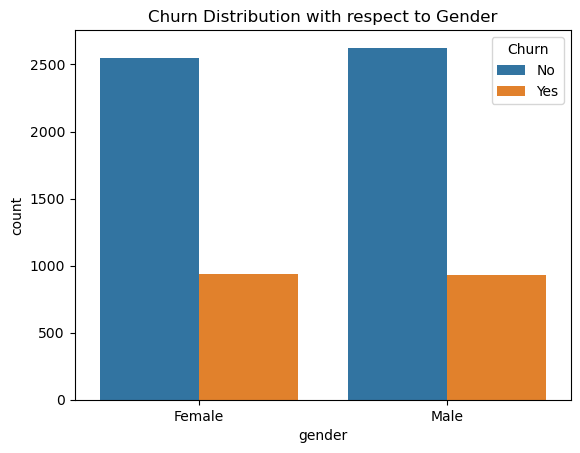

In [11]:
sns.countplot(x='gender',hue='Churn' , data=df)
plt.title('Churn Distribution with respect to Gender')
plt.show()

We can see that there is no big impact of gender in churn prediction

In [12]:
df.drop('gender',axis=1,inplace=True)

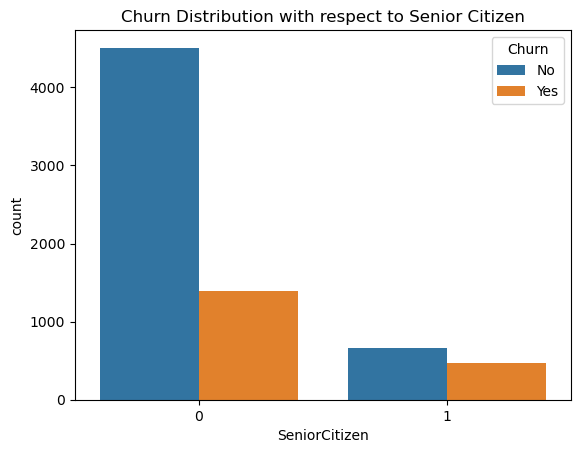

In [13]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
plt.title('Churn Distribution with respect to Senior Citizen')
plt.show()

We can see that mostly senior citzens are not prone to churn ,mainly youth are prone churn 

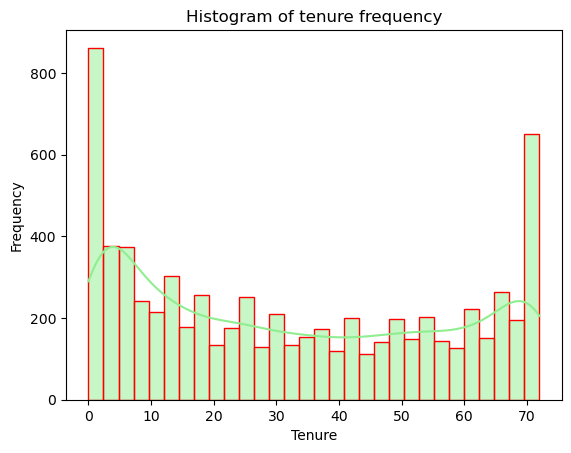

In [14]:
m= df['tenure']
sns.histplot(m, bins=30, kde=True, color='lightgreen', edgecolor='red')
 
# Adding labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of tenure frequency')
 
# Display the plot
plt.show()

Here Tenure means : The length of time an account has been a customer or active user

We can observe that most of the tenure is between  10 to 60


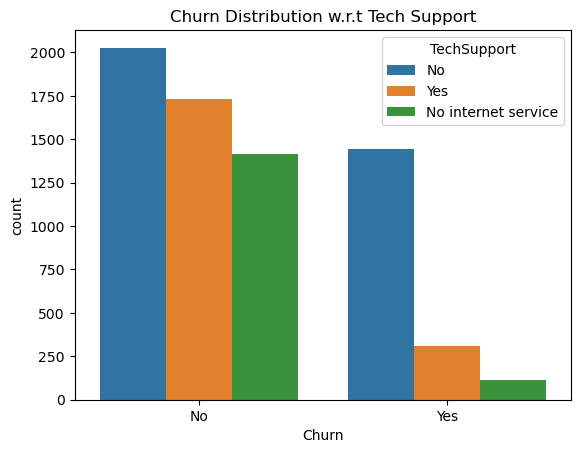

In [15]:
# Chrun wrt to Techsupport
sns.countplot(x='Churn', hue='TechSupport', data=df)
plt.title('Churn Distribution w.r.t Tech Support')
plt.show()


Customers with no tech support are more churn

In [16]:
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values in the dataset

In [19]:
#changing the datatype of total_charges
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [20]:
df.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [22]:
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Encoding


In [23]:
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

In [24]:
categorical_cols=['Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'Churn']

In [25]:
for i in categorical_cols:
    df[i]=le.fit_transform(df[i])

In [26]:
df.head(20)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1
5,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,Electronic check,99.65,820.50,1
6,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,Mailed check,29.75,301.90,0
8,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,Electronic check,104.80,3046.05,1
9,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,Bank transfer (automatic),56.15,3487.95,0


Here we can observe that all the categorical columns have been encoded to numerical values

Except for the column PaymentMethod

In [27]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [28]:
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4})

In [29]:
df.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,1,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,2,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,2,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,3,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1
5,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,1,99.65,820.50,1
6,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,4,89.10,1949.40,0
7,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,2,29.75,301.90,0
8,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,1,104.80,3046.05,1
9,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,3,56.15,3487.95,0


Model Creating

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
x= df.drop('Churn',axis=1)
y=df['Churn']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Scaling


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


Model Fitting


In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)


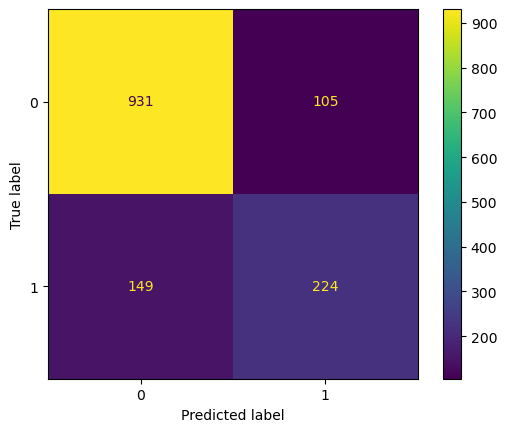

In [44]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
print('Accuracy_score',accuracy_score(y_test,y_pred))

Accuracy_score 0.8183108587650816


In [56]:
print('Classification_report', classification_report(y_test,y_pred))

Classification_report               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

